In [1]:
import pandas as pd

# 读取第一个 CSV 文件
res = pd.read_csv('seeds_and_errors_residual.csv')

# 读取第二个 CSV 文件
fuhe = pd.read_csv('seeds_and_errors_fuhe.csv')

# 打印数据框的前几行以验证读取是否成功
print(res.head())
print(fuhe.head())

    Seed     Error
0  50494  0.068837
1  99346  0.047636
2  55125  0.046380
3   5306  0.050141
4  33936  0.053441
    Seed     Error
0  50494  0.061892
1  99346  0.043612
2  55125  0.036717
3   5306  0.038136
4  33936  0.043168


In [2]:
import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。


from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import os
import pickle

import timeit #用于计时和测量小段代码的执行时间
import seaborn as sns  # 导入seaborn库用于绘制密度图
import pandas as pd #一个用于数据操作和分析的库，提供了数据结构和数据分析工具，特别是用于处理表格数据（类似于Excel中的数据表）

In [3]:
fuhe

,Seed,Error
0,50494,0.061892
1,99346,0.043612
2,55125,0.036717
3,5306,0.038136
4,33936,0.043168
...,...,...
195,9175,0.046806
196,28944,0.039730
197,9433,0.037206
198,84793,0.039355


In [4]:
res

,Seed,Error
0,50494,0.068837
1,99346,0.047636
2,55125,0.046380
3,5306,0.050141
4,33936,0.053441
...,...,...
195,9175,0.053098
196,28944,0.050058
197,9433,0.045134
198,84793,0.044109


In [5]:
# 找到两个数据集中相同的 Seed 值
common_seeds = pd.merge(res, fuhe, on='Seed', how='inner')

# 打印相同的 Seed 值
print("相同的 Seed 值:")
print(common_seeds['Seed'])

相同的 Seed 值:
0      50494
1      99346
2      55125
3       5306
4      33936
       ...  
195     9175
196    28944
197     9433
198    84793
199    39460
Name: Seed, Length: 200, dtype: int64


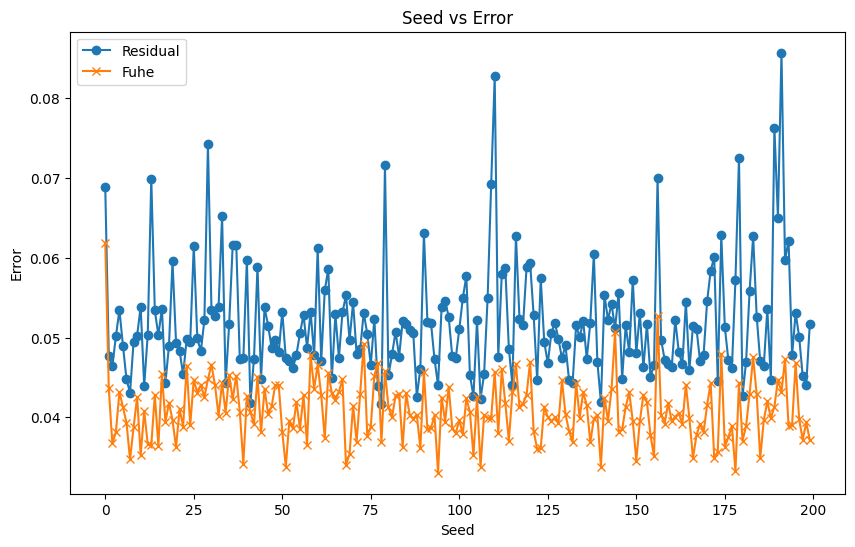

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# 绘制图像
plt.figure(figsize=(10, 6))

# 绘制第一个数据集
plt.plot(range(200), res['Error'], label='Residual', marker='o')

# 绘制第二个数据集
plt.plot(range(200), fuhe['Error'], label='Fuhe', marker='x')

# 添加标题和标签
plt.title('Seed vs Error')
plt.xlabel('Seed')
plt.ylabel('Error')

# 添加图例
plt.legend()

# 显示图像
plt.show()

In [7]:
# 假设 res 和 fuhe 是 pandas DataFrame
# 计算误差差异
res['Difference'] = (res['Error'] - fuhe['Error'])

# 找到误差差异最大的10个seed
top_10_diff = res.nlargest(10, 'Difference')

print("误差差异最大的10个seed:")
print(top_10_diff)


误差差异最大的10个seed:
      Seed     Error  Difference
191  55786  0.085698    0.042525
110  19601  0.082748    0.037074
189   2986  0.076273    0.034945
13   66150  0.069921    0.033414
29   89651  0.074217    0.029474
109  17068  0.069183    0.029259
179   2835  0.072488    0.028158
79   92610  0.071582    0.025833
172  15688  0.060067    0.025120
178  79364  0.057254    0.024026


In [8]:
tisheng=res['Difference']/res['Error']
# tisheng
top_10=tisheng.nlargest(10)
last_10 = tisheng.nsmallest(10)
pingjun=tisheng.mean()
print("误差差异最大的10个seed:")
print(top_10)
print("误差差异最小的10个seed:")
print(last_10)
print("误差差异的平均值:")
print(pingjun)

误差差异最大的10个seed:
191    0.496223
13     0.477888
189    0.458165
110    0.448037
109    0.422920
178    0.419642
172    0.418204
29     0.397130
179    0.388455
68     0.384499
dtype: float64
误差差异最小的10个seed:
77    -0.064871
144    0.008579
115    0.021625
41     0.026919
64     0.041979
88     0.053103
129    0.058807
23     0.066765
11     0.072790
152    0.073643
dtype: float64
误差差异的平均值:
0.20464981599435828
